# Data Scrapping

In [ ]:
import requests
import zipfile
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define the URL of the outer zip file you want to download
outer_zip_file_url = "https://phm-datasets.s3.amazonaws.com/NASA/13.+MOSFET+Thermal+Overstress+Aging.zip"

# Specify the destination folder in your Google Drive where you want to unzip the contents
destination_folder = '/content/drive/My Drive/713 DS Project/Data/'

# Download the outer zip file from the URL
response = requests.get(outer_zip_file_url, stream=True)
if response.status_code == 200:
    with open('/content/outer_temp.zip', 'wb') as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)
    print("Outer zip file downloaded successfully.")

    # Unzip the outer zip file to a temporary folder
    with zipfile.ZipFile('/content/outer_temp.zip', 'r') as outer_zip_ref:
        outer_zip_ref.extractall('/content/outer_temp/')
    print("Outer zip file contents have been extracted to a temporary folder.")

    # Define the path to the inner zip file
    inner_zip_path = '/content/outer_temp/13. MOSFET Thermal Overstress Aging/MOSFET_Thermal_Overstress_Aging_v0.zip'

    # Unzip the inner zip file to the destination folder
    with zipfile.ZipFile(inner_zip_path, 'r') as inner_zip_ref:
        inner_zip_ref.extractall(destination_folder)
    print(f"Inner zip file contents have been extracted to: {destination_folder}")

    # Remove the temporary zip files and folder
    !rm /content/outer_temp.zip
    !rm -r /content/outer_temp
else:
    print("Failed to download the outer zip file")


Mounted at /content/drive
Outer zip file downloaded successfully.
Outer zip file contents have been extracted to a temporary folder.
Inner zip file contents have been extracted to: /content/drive/My Drive/713 DS Project/Data/


Steady State Data

Given that the temperature coefficient for the breakdown voltage is 0.11V/°C, and the static drain-to-source on-resistance is 0.20(Ω), we can calculate the temperature coefficient in terms of (Ω/°C):

α = 0.11 × 0.20 = 0.022 Ω/°C

Therefore, the temperature coefficient in terms of (Ω/°C) for the IRF520NPbF HEXFET Power MOSFET is 0.022(Ω/°C)

steadyState_df_Test_10_run_7
Deleted rows due to Rds(ON) not between 0 and 5: 0


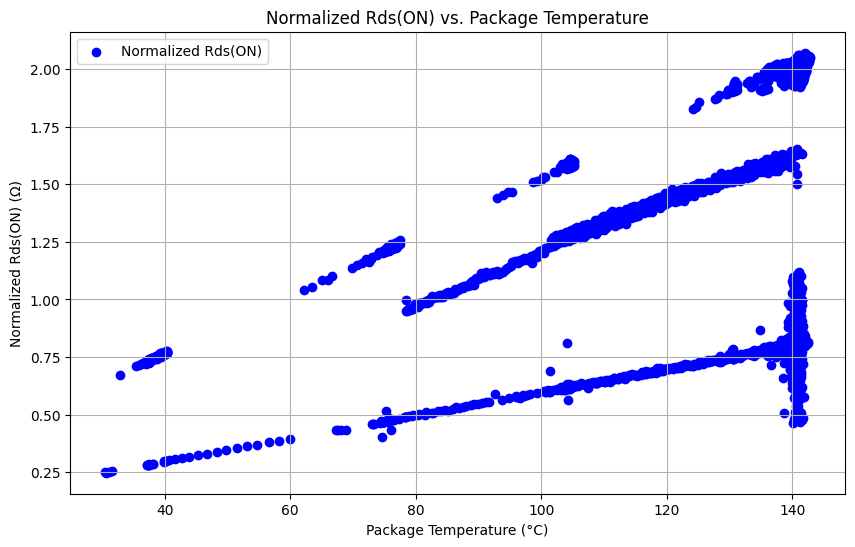

,date,supplyVoltage,packageTemperature,drainSourceVoltage,drainCurrent,lowTemp,highTemp,shutdownTemp,gateVoltage,supplyVoltage_controller,Rds(ON),normalized_Rds(ON)
0,2010-03-18 10:48:00.779,5.607484,30.552254,4.797802,3.638579,39.0,40.0,280.0,10.0,5.0,0.222527,0.249709
1,2010-03-18 10:48:01.058,5.616776,30.743935,4.851098,3.486329,39.0,40.0,280.0,10.0,5.0,0.219623,0.247376
2,2010-03-18 10:48:01.462,5.608558,31.077112,4.827528,3.550617,39.0,40.0,280.0,10.0,5.0,0.219970,0.249380
3,2010-03-18 10:48:01.860,5.616916,31.659442,4.848235,3.457045,39.0,40.0,280.0,10.0,5.0,0.222352,0.254928
4,2010-03-18 10:48:02.363,5.621213,32.852435,5.578682,0.074017,39.0,40.0,280.0,10.0,5.0,0.574615,0.673882
...,...,...,...,...,...,...,...,...,...,...,...,...
34662,2010-03-18 14:42:06.804,5.615171,139.767584,5.138452,2.097869,NaN,NaN,NaN,NaN,NaN,0.227240,0.800995
34663,2010-03-18 14:42:07.207,5.615032,139.686475,5.147402,2.062412,NaN,NaN,NaN,NaN,NaN,0.226740,0.798827
34664,2010-03-18 14:42:07.606,5.619232,139.755765,5.170474,1.967415,NaN,NaN,NaN,NaN,NaN,0.228095,0.803950
34665,2010-03-18 14:42:08.006,5.615437,139.812428,5.162410,2.007210,NaN,NaN,NaN,NaN,NaN,0.225700,0.795789


In [ ]:
import scipy.io
import pandas as pd
from datetime import datetime
import os
import numpy as np

def process_mat_file(mat_file_path):
    # Load the MATLAB file
    mat_data = scipy.io.loadmat(mat_file_path)

    # Access the 'measurement' data
    measurement_data = mat_data['measurement']

    # Extract the 'pwmTempControllerState' data
    controller_data = measurement_data['pwmTempControllerState']

    # Extract the 'steadyState' data
    steady_state_data = measurement_data['steadyState']

    # Extracting data into lists
    date = []
    nanosec_time = []
    timeEpoch = []
    supplyVoltage = []
    packageTemperature = []
    drainSourceVoltage = []
    drainCurrent = []
    flangeTemperature = []
    Rds = []
    low_T = []
    high_T = []
    shutdown_T = []
    gate_volt = []
    supply_volt = []

    for row in steady_state_data[0][0]:
        for element in row:
            date.append(element[0][0])
            nanosec_time.append(element[1][0][0])
            timeEpoch.append(element[2][0][0])
            supplyVoltage.append(element[3][0][0][0][0][0])
            packageTemperature.append(element[3][0][0][1][0][0])
            drainSourceVoltage.append(element[3][0][0][2][0][0])
            drainCurrent.append(element[3][0][0][3][0][0])
            flangeTemperature.append(element[3][0][0][4][0][0])
            # Calculate RDS(ON) element-wise
            #Rds.append(element[3][0][0][2][0][0] / element[3][0][0][3][0][0])

    for row in controller_data[0][0]:
      for element in row:
        low_T.append(element[3][0][0])
        high_T.append(element[4][0][0])
        shutdown_T.append(element[5][0][0])
        gate_volt.append(element[6][0][0])
        supply_volt.append(element[7][0][0])

    # Find the maximum length among all columns
    max_length = max(len(date), len(supplyVoltage), len(packageTemperature), len(drainSourceVoltage),
                 len(drainCurrent), len(low_T), len(high_T), len(shutdown_T), len(gate_volt),
                 len(supply_volt))
    # Creating a DataFrame
    df = pd.DataFrame({
        'date': date + [np.nan] * (max_length - len(date)),
        'supplyVoltage': supplyVoltage + [np.nan] * (max_length - len(supplyVoltage)),
        'packageTemperature': packageTemperature + [np.nan] * (max_length - len(packageTemperature)),
        'drainSourceVoltage': drainSourceVoltage + [np.nan] * (max_length - len(drainSourceVoltage)),
        'drainCurrent': drainCurrent + [np.nan] * (max_length - len(drainCurrent)),
        'lowTemp': low_T + [np.nan] * (max_length - len(low_T)),
        'highTemp': high_T + [np.nan] * (max_length - len(high_T)),
        'shutdownTemp': shutdown_T + [np.nan] * (max_length - len(shutdown_T)),
        'gateVoltage': gate_volt + [np.nan] * (max_length - len(gate_volt)),
        'supplyVoltage_controller': supply_volt + [np.nan] * (max_length - len(supply_volt))

    })

    df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S.%f"))
    df['Rds(ON)'] = ((df['supplyVoltage']-df['drainSourceVoltage'])/(df['drainCurrent']))

    # Calculate normalized Rds(ON)
    alpha = 0.022  # Temperature coefficient in Ω/°C
    T_ref = 25
    delta_T = df['packageTemperature'] - T_ref
    normalized_Rds_ON = df['Rds(ON)'] * (1 + alpha * delta_T)

    # Add normalized Rds(ON) to the DataFrame
    df['normalized_Rds(ON)'] = normalized_Rds_ON

    # Get the MATLAB file name without the extension
    file_name = os.path.splitext(os.path.basename(mat_file_path))[0]

    # Counting deleted rows
    deleted_rows = 0
    #if 'Rds(ON)' in df.columns:
     #   deleted_rows = len(df[(df['Rds(ON)'] < 0) | (df['Rds(ON)'] > 5)])
     #   df = df[(df['Rds(ON)'] >= 0) & (df['Rds(ON)'] <= 5)]

    return df, f'steadyState_df_{file_name}', deleted_rows

# Define the directory containing the MATLAB files
mat_file_path = '/content/drive/My Drive/713 DS Project/Data/MOSFET_Thermal_Overstress_Aging_v0/Test_10_run_7.mat'
result_df, df_name, deleted_rows = process_mat_file(mat_file_path)

print(df_name)
print(f"Deleted rows due to Rds(ON) not between 0 and 5: {deleted_rows}")


import matplotlib.pyplot as plt

# Plot normalized Rds(ON) with package temperature
plt.figure(figsize=(10, 6))
plt.scatter(result_df['packageTemperature'], result_df['normalized_Rds(ON)'], color='b', label='Normalized Rds(ON)')
plt.xlabel('Package Temperature (°C)')
plt.ylabel('Normalized Rds(ON) (Ω)')
plt.title('Normalized Rds(ON) vs. Package Temperature')
plt.legend()
plt.grid(True)
plt.show()
result_df

In [ ]:
import scipy.io
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt

def process_mat_file(mat_file_path):
    # Load the MATLAB file
    mat_data = scipy.io.loadmat(mat_file_path)

    # Access the 'measurement' data
    measurement_data = mat_data['measurement']

    # Extract the 'steadyState' data
    steady_state_data = measurement_data['steadyState']

    # Extracting data into lists
    date = []
    nanosec_time = []
    timeEpoch = []
    supplyVoltage = []
    packageTemperature = []
    drainSourceVoltage = []
    drainCurrent = []
    flangeTemperature = []
    Rds = []

    for row in steady_state_data[0][0]:
        for element in row:
            date.append(element[0][0])
            nanosec_time.append(element[1][0][0])
            timeEpoch.append(element[2][0][0])
            supplyVoltage.append(element[3][0][0][0][0][0])
            packageTemperature.append(element[3][0][0][1][0][0])
            drainSourceVoltage.append(element[3][0][0][2][0][0])
            drainCurrent.append(element[3][0][0][3][0][0])
            flangeTemperature.append(element[3][0][0][4][0][0])

    # Creating a DataFrame
    df = pd.DataFrame({
        'date': date,
        'nanosec_time': nanosec_time,
        'timeEpoch': timeEpoch,
        'supplyVoltage': supplyVoltage,
        'packageTemperature': packageTemperature,
        'drainSourceVoltage': drainSourceVoltage,
        'drainCurrent': drainCurrent,
        'flangeTemperature': flangeTemperature
    })

    # Convert 'date' column to datetime index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Resample the data to one-minute intervals and calculate the mean
    resampled_df = df.resample('1.1T').mean()

    # Calculate Rds from Vds and Id
    resampled_df['Rds'] = (resampled_df['supplyVoltage'] - resampled_df['drainSourceVoltage']) / resampled_df['drainCurrent']

    # Calculate normalized Rds(ON) using Rds
    alpha = 0.022  # Temperature coefficient in Ω/°C
    T_ref = 25
    delta_T = resampled_df['packageTemperature'] - T_ref
    resampled_df['normalized_Rds(ON)'] = resampled_df['Rds'] * (1 + alpha * delta_T)

    return resampled_df, f'steadyState_df_{os.path.splitext(os.path.basename(mat_file_path))[0]}'

# Define the directory containing the MATLAB files
mat_file_path = '/content/drive/My Drive/713 DS Project/Data/MOSFET_Thermal_Overstress_Aging_v0/Test_1_run_2.mat'
result_df, df_name = process_mat_file(mat_file_path)

# Plot normalized Rds(ON) with package temperature as a line plot
plt.figure(figsize=(10, 6))
plt.plot(result_df['packageTemperature'], result_df['normalized_Rds(ON)'], color='b', label='Normalized Rds(ON)')
plt.xlabel('Package Temperature (°C)')
plt.ylabel('Normalized Rds(ON) (Ω)')
plt.title('Normalized Rds(ON) vs. Package Temperature')
plt.legend()
plt.grid(True)
plt.show()

result_df

In [ ]:
import scipy.io
import pandas as pd
from datetime import datetime
import os
import numpy as np
import pandas as pd

def process_mat_file(mat_file_path):
    # Load the MATLAB file
    mat_data = scipy.io.loadmat(mat_file_path)

    # Access the 'measurement' data
    measurement_data = mat_data['measurement']

    # Extract the 'pwmTempControllerState' data
    controller_data = measurement_data['pwmTempControllerState']

    # Extract the 'steadyState' data
    steady_state_data = measurement_data['steadyState']

    # Extracting data into lists
    date = []
    nanosec_time = []
    timeEpoch = []
    supplyVoltage = []
    packageTemperature = []
    drainSourceVoltage = []
    drainCurrent = []
    flangeTemperature = []
    Rds = []
    low_T = []
    high_T = []
    shutdown_T = []
    gate_volt = []
    supply_volt = []

    for row in steady_state_data[0][0]:
        for element in row:
            date.append(element[0][0])
            nanosec_time.append(element[1][0][0])
            timeEpoch.append(element[2][0][0])
            supplyVoltage.append(element[3][0][0][0][0][0])
            packageTemperature.append(element[3][0][0][1][0][0])
            drainSourceVoltage.append(element[3][0][0][2][0][0])
            drainCurrent.append(element[3][0][0][3][0][0])
            flangeTemperature.append(element[3][0][0][4][0][0])
            # Calculate RDS(ON) element-wise
            #Rds.append(element[3][0][0][2][0][0] / element[3][0][0][3][0][0])

    for row in controller_data[0][0]:
      for element in row:
        low_T.append(element[3][0][0])
        high_T.append(element[4][0][0])
        shutdown_T.append(element[5][0][0])
        gate_volt.append(element[6][0][0])
        supply_volt.append(element[7][0][0])

    # Find the maximum length among all columns
    max_length = max(len(date), len(supplyVoltage), len(packageTemperature), len(drainSourceVoltage),
                 len(drainCurrent), len(low_T), len(high_T), len(shutdown_T), len(gate_volt),
                 len(supply_volt))
    # Creating a DataFrame
    df = pd.DataFrame({
        'date': date + [np.nan] * (max_length - len(date)),
        'supplyVoltage': supplyVoltage + [np.nan] * (max_length - len(supplyVoltage)),
        'packageTemperature': packageTemperature + [np.nan] * (max_length - len(packageTemperature)),
        'drainSourceVoltage': drainSourceVoltage + [np.nan] * (max_length - len(drainSourceVoltage)),
        'drainCurrent': drainCurrent + [np.nan] * (max_length - len(drainCurrent)),
        'lowTemp': low_T + [np.nan] * (max_length - len(low_T)),
        'highTemp': high_T + [np.nan] * (max_length - len(high_T)),
        'shutdownTemp': shutdown_T + [np.nan] * (max_length - len(shutdown_T)),
        'gateVoltage': gate_volt + [np.nan] * (max_length - len(gate_volt)),
        'supplyVoltage_controller': supply_volt + [np.nan] * (max_length - len(supply_volt))
    })

    # Convert 'date' column to datetime index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Resample the data to one-minute intervals and calculate the mean
    resampled_df = df.resample('1.2T').mean()

    # Calculate Rds from Vds and Id
    resampled_df['Rds'] = (resampled_df['supplyVoltage'] - resampled_df['drainSourceVoltage']) / resampled_df['drainCurrent']

    # Calculate normalized Rds(ON) using Rds
    alpha = 0.022  # Temperature coefficient in Ω/°C
    T_ref = 25
    delta_T = resampled_df['packageTemperature'] - T_ref
    resampled_df['normalized_Rds(ON)'] = resampled_df['Rds'] * (1 + alpha * delta_T)

    return resampled_df, f'steadyState_df_{os.path.splitext(os.path.basename(mat_file_path))[0]}'

# Define the directory containing the MATLAB files
mat_file_directory = '/content/drive/My Drive/713 DS Project/Data/MOSFET_Thermal_Overstress_Aging_v0/'

# List all .mat files in the specified directory
mat_files = [f for f in os.listdir(mat_file_directory) if f.endswith('.mat')]

# Process each .mat file and save the DataFrames
for mat_file in mat_files:
    mat_file_path = os.path.join(mat_file_directory, mat_file)
    result_df, df_name = process_mat_file(mat_file_path)

    # Save the DataFrame with the desired name
    globals()[df_name] = result_df

    # Print the DataFrame name
    print(f'{df_name}')

steadyState_df_Test_10_run_1
steadyState_df_Test_10_run_2
steadyState_df_Test_10_run_3
steadyState_df_Test_10_run_4
steadyState_df_Test_10_run_5
steadyState_df_Test_10_run_6
steadyState_df_Test_10_run_7
steadyState_df_Test_11_run_1
steadyState_df_Test_11_run_2
steadyState_df_Test_11_run_3
steadyState_df_Test_11_run_4
steadyState_df_Test_11_run_5
steadyState_df_Test_11_run_6
steadyState_df_Test_11_run_7
steadyState_df_Test_12_run_1
steadyState_df_Test_12_run_2
steadyState_df_Test_12_run_3
steadyState_df_Test_12_run_4
steadyState_df_Test_12_run_5
steadyState_df_Test_12_run_6
steadyState_df_Test_12_run_7
steadyState_df_Test_13_run_1 1 (error setting up this run)
steadyState_df_Test_13_run_1
steadyState_df_Test_13_run_2
steadyState_df_Test_13_run_3
steadyState_df_Test_13_run_4
steadyState_df_Test_13_run_5
steadyState_df_Test_14_run_1
steadyState_df_Test_14_run_2
steadyState_df_Test_14_run_3
steadyState_df_Test_14_run_4
steadyState_df_Test_14_run_5
steadyState_df_Test_14_run_6
steadyState_d

<ipython-input-2-a27a4b487b95>:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample('1.2T').mean()


steadyState_df_Test_15_run_1
steadyState_df_Test_16_run_1
steadyState_df_Test_17_run_1
steadyState_df_Test_18_run_1
steadyState_df_Test_18_run_2
steadyState_df_Test_19_run_1
steadyState_df_Test_19_run_2
steadyState_df_Test_1_run_1
steadyState_df_Test_1_run_2
steadyState_df_Test_20_run_1
steadyState_df_Test_20_run_2
steadyState_df_Test_21_run_1
steadyState_df_Test_22_run_1
steadyState_df_Test_23_run_1
steadyState_df_Test_23_run_2
steadyState_df_Test_24_run_1
steadyState_df_Test_24_run_2
steadyState_df_Test_25_run_1
steadyState_df_Test_25_run_2
steadyState_df_Test_25_run_3
steadyState_df_Test_25_run_4
steadyState_df_Test_26_run_1
steadyState_df_Test_27_run_1
steadyState_df_Test_27_run_2
steadyState_df_Test_27_run_3
steadyState_df_Test_27_run_4
steadyState_df_Test_27_run_5
steadyState_df_Test_28_run_1
steadyState_df_Test_28_run_2
steadyState_df_Test_29_run_1
steadyState_df_Test_2_run_1
steadyState_df_Test_2_run_2
steadyState_df_Test_2_run_3
steadyState_df_Test_30_run_1
steadyState_df_Test

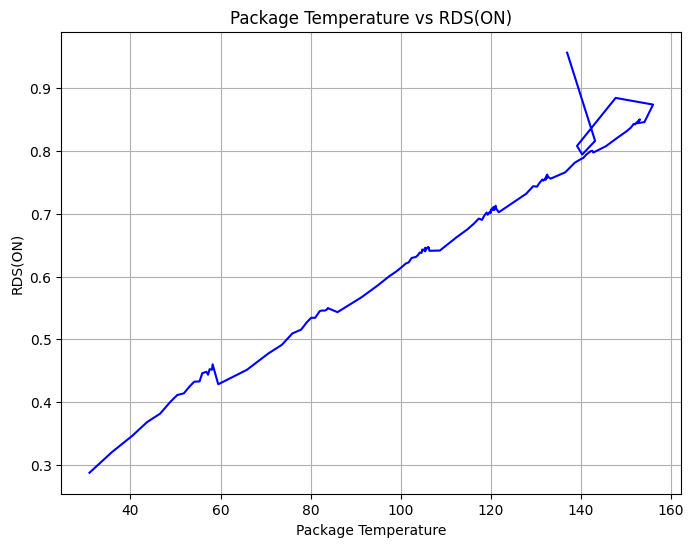

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.plot(steadyState_df_test_rampup['packageTemperature'], steadyState_df_test_rampup['normalized_Rds(ON)'], color='b', label='Normalized Rds(ON)')
plt.xlabel('Package Temperature')
plt.ylabel('RDS(ON)')
plt.title('Package Temperature vs RDS(ON)')
plt.grid(True)
plt.show()


<ipython-input-76-c5095048ae1f>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', 11)  # Choosing a colormap with 11 colors


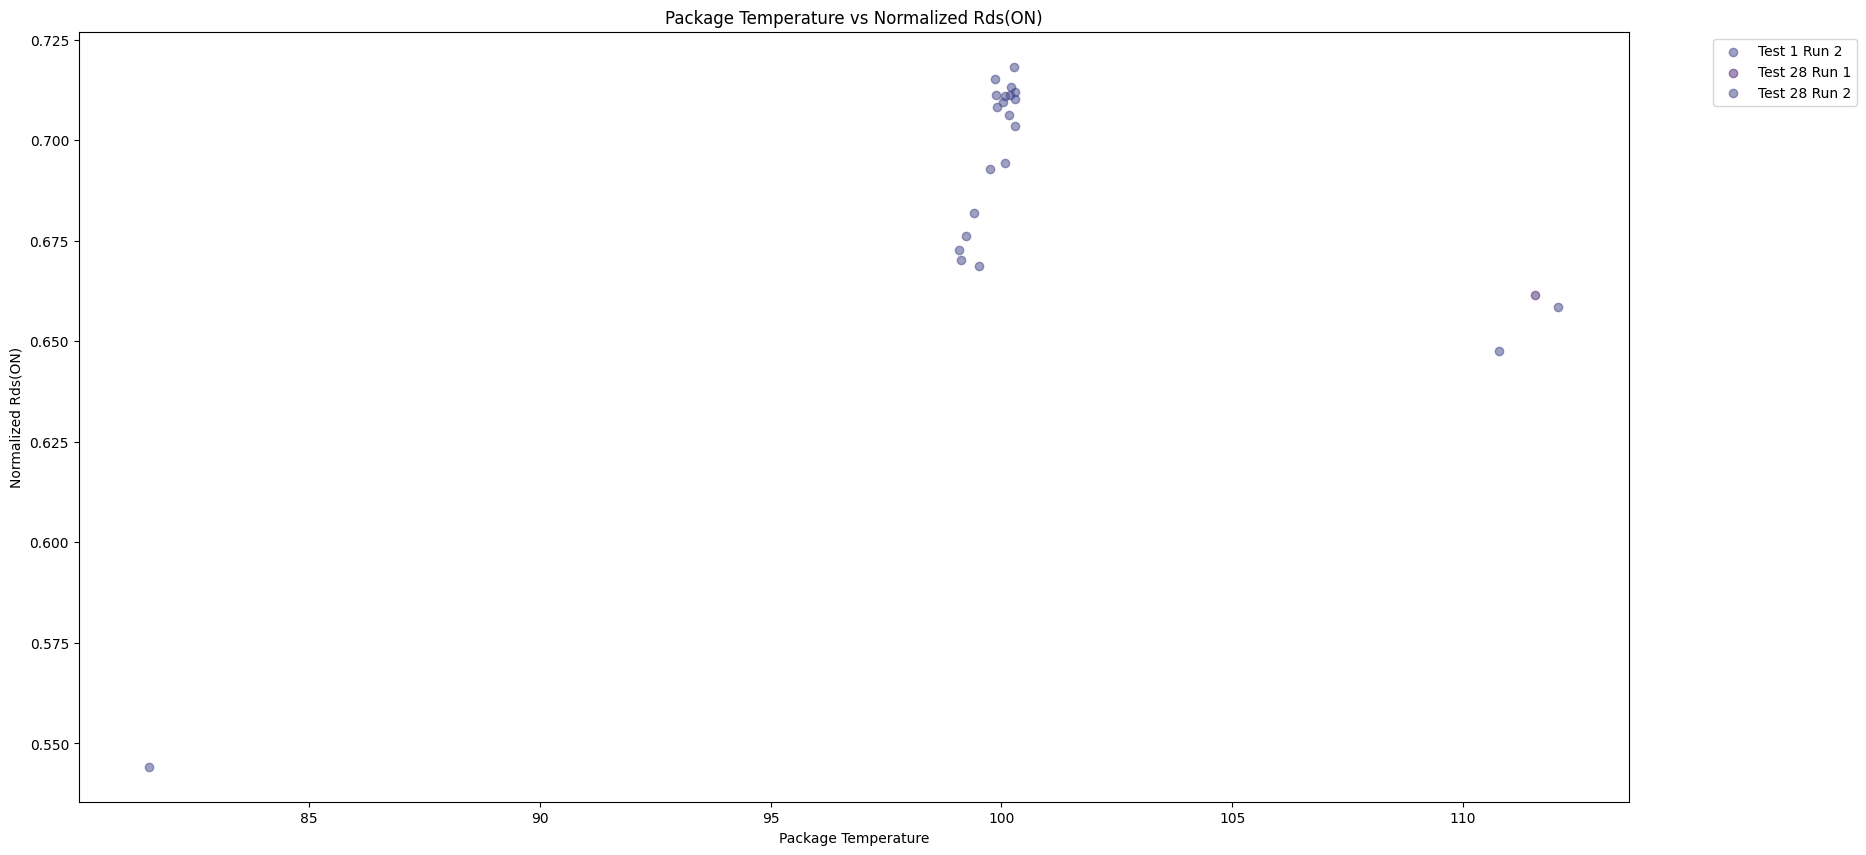

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Importing cm from matplotlib

plt.figure(figsize=(20, 10))  # Adjust figure size if needed

for X in range(1, 51):
    color_map = cm.get_cmap('viridis', 11)  # Choosing a colormap with 11 colors
    for Y in range(1, 11):
        dataframe_name = f'steadyState_df_Test_{X}_run_{Y}'
        if dataframe_name in locals():
            current_df = locals()[dataframe_name]
            # Check gateVoltage column for values not equal to 10 or NaN
            valid_rows = current_df[
                (current_df['gateVoltage'] != 10) & (~current_df['gateVoltage'].isnull())
            ]
            if not valid_rows.empty:
                plt.scatter(
                    valid_rows['packageTemperature'],
                    valid_rows['normalized_Rds(ON)'],
                    label=f'Test {X} Run {Y}',
                    alpha=0.5,
                    color=color_map(Y / 10)  # Adjusting color map index
                )

plt.xlabel('Package Temperature')
plt.ylabel('Normalized Rds(ON)')
plt.title('Package Temperature vs Normalized Rds(ON)')
# Legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Data Processing

In [ ]:
import pandas as pd
import numpy as np

# List of all dataframes
old_dataframes_list = [
    steadyState_df_Test_10_run_1, steadyState_df_Test_10_run_2, steadyState_df_Test_10_run_3, steadyState_df_Test_10_run_4, steadyState_df_Test_10_run_5, steadyState_df_Test_10_run_6,
    steadyState_df_Test_10_run_7, steadyState_df_Test_11_run_1, steadyState_df_Test_11_run_2, steadyState_df_Test_11_run_3, steadyState_df_Test_11_run_4, steadyState_df_Test_11_run_5,
    steadyState_df_Test_11_run_6, steadyState_df_Test_11_run_7, steadyState_df_Test_12_run_1, steadyState_df_Test_12_run_2, steadyState_df_Test_12_run_3, steadyState_df_Test_12_run_4,
    steadyState_df_Test_12_run_5, steadyState_df_Test_12_run_6, steadyState_df_Test_12_run_7, steadyState_df_Test_13_run_1, steadyState_df_Test_13_run_2,
    steadyState_df_Test_13_run_3, steadyState_df_Test_13_run_4, steadyState_df_Test_13_run_5, steadyState_df_Test_14_run_1, steadyState_df_Test_14_run_2, steadyState_df_Test_14_run_3,
    steadyState_df_Test_14_run_4, steadyState_df_Test_14_run_5, steadyState_df_Test_14_run_6, steadyState_df_Test_14_run_7, steadyState_df_Test_15_run_1, steadyState_df_Test_16_run_1,
    steadyState_df_Test_17_run_1, steadyState_df_Test_18_run_1, steadyState_df_Test_18_run_2, steadyState_df_Test_19_run_1, steadyState_df_Test_19_run_2, steadyState_df_Test_1_run_1,
    steadyState_df_Test_1_run_2, steadyState_df_Test_20_run_1, steadyState_df_Test_20_run_2, steadyState_df_Test_21_run_1, steadyState_df_Test_22_run_1, steadyState_df_Test_23_run_1,
    steadyState_df_Test_23_run_2, steadyState_df_Test_24_run_1, steadyState_df_Test_24_run_2, steadyState_df_Test_25_run_1, steadyState_df_Test_25_run_2, steadyState_df_Test_25_run_3,
    steadyState_df_Test_25_run_4, steadyState_df_Test_26_run_1, steadyState_df_Test_27_run_1, steadyState_df_Test_27_run_2, steadyState_df_Test_27_run_3, steadyState_df_Test_27_run_4,
    steadyState_df_Test_27_run_5, steadyState_df_Test_28_run_1, steadyState_df_Test_28_run_2, steadyState_df_Test_29_run_1, steadyState_df_Test_2_run_1, steadyState_df_Test_2_run_2,
    steadyState_df_Test_2_run_3, steadyState_df_Test_30_run_1, steadyState_df_Test_31_run_1, steadyState_df_Test_32_run_1, steadyState_df_Test_33_run_1, steadyState_df_Test_34_run_1,
    steadyState_df_Test_34_run_2, steadyState_df_Test_34_run_3, steadyState_df_Test_35_run_1, steadyState_df_Test_36_run_1, steadyState_df_Test_37_run_1, steadyState_df_Test_38_run_1,
    steadyState_df_Test_39_run_1, steadyState_df_Test_3_run_1, steadyState_df_Test_40_run_1, steadyState_df_Test_40_run_2, steadyState_df_Test_41_run_1, steadyState_df_Test_42_run_1,
    steadyState_df_Test_4_run_1, steadyState_df_Test_4_run_2, steadyState_df_Test_5_run_1, steadyState_df_Test_5_run_2, steadyState_df_Test_6_run_1, steadyState_df_Test_6_run_2,
    steadyState_df_Test_7_run_1, steadyState_df_Test_8_run_1, steadyState_df_Test_8_run_2, steadyState_df_Test_8_run_3, steadyState_df_Test_8_run_4, steadyState_df_Test_8_run_5,
    steadyState_df_Test_8_run_6, steadyState_df_Test_8_run_7, steadyState_df_Test_9_run_1, steadyState_df_Test_9_run_2, steadyState_df_Test_9_run_3, steadyState_df_Test_9_run_4,
    steadyState_df_Test_9_run_5, steadyState_df_Test_9_run_6, steadyState_df_Test_9_run_7, steadyState_df_test_rampup
]

# List to store dataframes
dataframes_list = [steadyState_df_test_rampup]

# Loop through the possible dataframe names
for X in range(1, 51):
    for Y in range(1, 11):
        dataframe_name = f'steadyState_df_Test_{X}_run_{Y}'
        # Check if the dataframe exists in locals()
        if dataframe_name in locals():
            current_df = locals()[dataframe_name]
            dataframes_list.append(current_df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes_list)

# Reset the 'date' index to a regular column
combined_df.reset_index(inplace=True)
combined_df['date'] = combined_df['date'].apply(lambda x: x.timestamp())

# Randomly shuffle the combined dataframe rows
shuffled_df = combined_df.sample(frac=1, random_state=42)  # Set random_state for reproducibility

# Calculate the index where to split the data
split_index = int(0.8 * len(shuffled_df))

# Split the shuffled data into train and test sets
train_df = shuffled_df.iloc[:split_index]
test_df = shuffled_df.iloc[split_index:]

# Reset index for train and test sets if needed
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Save the combined_df to a CSV file
csv_file_directory = '/content/drive/My Drive/713 DS Project/Data/csv/'
combined_df.to_csv(csv_file_directory + 'combined_df.csv', index=False)


In [ ]:
import pandas as pd
# Reload the data from the saved CSV file
csv_file_directory = '/content/drive/My Drive/713 DS Project/Data/csv/'
reloaded_df = pd.read_csv(csv_file_directory + 'combined_df.csv')

# Extract required columns
X = reloaded_df[['date', 'packageTemperature']].values  # Input features: Time and Temperature
y = reloaded_df['normalized_Rds(ON)'].values  # Output variable: Normalized Rds

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
#reloaded_df

Train set size: 8656
Test set size: 2164


# Data Processing

# GPR Model Training

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Define the kernel function with adjusted bounds
kernel = 1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e3))

# Create a Gaussian Process model with more restarts
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50, alpha=0.1, normalize_y=True)

# Train the model with the training data
gpr.fit(X_train, y_train)

# Make predictions on the test data
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Calculate R2 score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predictions vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gaussian Process Regressor: True vs. Predicted')
plt.show()